# Sentiment Analysis

## Imports

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [166]:

data_df =  pd.read_csv('Reviews.csv')

In [167]:
data_df.shape

(568454, 10)

In [168]:
data_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [169]:
data_df['ProductId'].value_counts().nlargest(20)

ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B007M83302    564
B001RVFEP2    564
B001RVFERK    564
B007M832YY    564
B0026KPDG8    564
B006HYLW32    564
B0013NUGDE    564
B000KV7ZGQ    556
B000KV61FC    556
B0013A0QXC    542
B005K4Q37A    542
Name: count, dtype: int64

In [170]:
product_df = data_df.loc[data_df['ProductId']=='B001RVFERK'].copy()

In [171]:
product_df.to_csv('product.csv')

In [172]:
product_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
485256,485257,B001RVFERK,A21SYVGVNG8RAS,Jennifer Sullivan,1,1,5,1298851200,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...
485257,485258,B001RVFERK,AQJYXC0MPRQJL,B. Perrin,1,1,5,1298851200,Great chip that is different from the rest,I like the puffed nature of this chip that mak...
485258,485259,B001RVFERK,A30NYUHEDLWI0Y,"Miriam ""Miriam""",1,1,5,1291852800,Great Alternative to Potato Chips,I just love these chips! I was always a big f...
485259,485260,B001RVFERK,A2NU55U9LKTB5J,divarett,1,1,3,1286928000,Not somthing I would crave,"These tasted like potatoe stix, that we got in..."
485260,485261,B001RVFERK,A225F7QFP5LIW2,ccde,1,1,5,1286236800,healthy and delicious,These chips are great! They look almost like ...


In [173]:
product_df.shape

(564, 10)

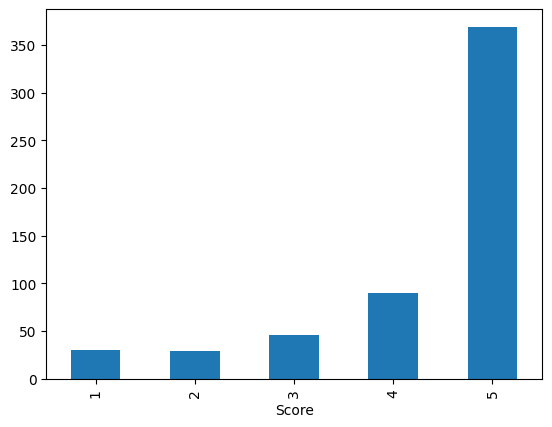

In [174]:
ax =  product_df['Score'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [175]:
product_df.reset_index(inplace=True,drop=True)

In [176]:

data_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [177]:
example_text  =  product_df['Text'][59]
example_text

"I first sampled these chips at a volleyball tournament in California.  I'm a big chip lover, and these are by far the best chips I've ever had.  Better than the baked; not greasy at all, sturdy for dips.  I highly recommend these chips to any chip lover!  (I've not purchased them from Amazon, so I don't know how they will fare during shipping.)"

In [178]:
# nltk.download()

## Sentiment Scores

In [179]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia =  SentimentIntensityAnalyzer()

In [180]:
sia.polarity_scores('The worst prosduct I have ever bought')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [181]:
sia.polarity_scores('Best product in the market')

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}

In [182]:
sia.polarity_scores(example_text)

{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.9611}

In [183]:
for index, row in product_df.iterrows():
    score = sia.polarity_scores(row['Text'])
    product_df.loc[index , ['pos']] = score['pos']
    product_df.loc[index , ['neg']] = score['neg']
    product_df.loc[index,  ['neu']] = score['neu']
    product_df.loc[index, ['compound']] = score['compound']

In [184]:
product_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,pos,neg,neu,compound
0,485257,B001RVFERK,A21SYVGVNG8RAS,Jennifer Sullivan,1,1,5,1298851200,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...,0.407,0.000,0.593,0.9244
1,485258,B001RVFERK,AQJYXC0MPRQJL,B. Perrin,1,1,5,1298851200,Great chip that is different from the rest,I like the puffed nature of this chip that mak...,0.102,0.021,0.877,0.7269
2,485259,B001RVFERK,A30NYUHEDLWI0Y,"Miriam ""Miriam""",1,1,5,1291852800,Great Alternative to Potato Chips,I just love these chips! I was always a big f...,0.286,0.050,0.664,0.9790
3,485260,B001RVFERK,A2NU55U9LKTB5J,divarett,1,1,3,1286928000,Not somthing I would crave,"These tasted like potatoe stix, that we got in...",0.224,0.000,0.776,0.8689
4,485261,B001RVFERK,A225F7QFP5LIW2,ccde,1,1,5,1286236800,healthy and delicious,These chips are great! They look almost like ...,0.335,0.050,0.615,0.9560


# Clean

Convert to lower case

In [185]:
product_df['Text'] = product_df['Text'].str.lower()

In [186]:
product_df.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,pos,neg,neu,compound
0,485257,B001RVFERK,A21SYVGVNG8RAS,Jennifer Sullivan,1,1,5,1298851200,Yummy snacks!,popchips are the bomb!! i use the parmesan ga...,0.407,0.000,0.593,0.9244
1,485258,B001RVFERK,AQJYXC0MPRQJL,B. Perrin,1,1,5,1298851200,Great chip that is different from the rest,i like the puffed nature of this chip that mak...,0.102,0.021,0.877,0.7269
2,485259,B001RVFERK,A30NYUHEDLWI0Y,"Miriam ""Miriam""",1,1,5,1291852800,Great Alternative to Potato Chips,i just love these chips! i was always a big f...,0.286,0.050,0.664,0.9790
3,485260,B001RVFERK,A2NU55U9LKTB5J,divarett,1,1,3,1286928000,Not somthing I would crave,"these tasted like potatoe stix, that we got in...",0.224,0.000,0.776,0.8689
4,485261,B001RVFERK,A225F7QFP5LIW2,ccde,1,1,5,1286236800,healthy and delicious,these chips are great! they look almost like ...,0.335,0.050,0.615,0.9560
5,485262,B001RVFERK,AWB39CSUQXSB3,"April ""Lighthouse""",1,1,2,1286064000,On the strong side,the flavors of these are a bit on the strong s...,0.328,0.000,0.672,0.9217
6,485263,B001RVFERK,A1BZEHZ038EUL2,NurseLovesDeals,1,1,5,1284336000,Love these!,"i love this brand of chips. by far, i like the...",0.277,0.000,0.723,0.9795
7,485264,B001RVFERK,A8E9ZAG5Y5RKH,stephchows,1,1,5,1283817600,Like crack,"these things are like crack, i can't stop eati...",0.363,0.000,0.637,0.7889
8,485265,B001RVFERK,A3W0GMJ0FYSW3J,"Alicia ""Bonita Morenita""",1,1,5,1283212800,Awesome healthIER snack option!,i first had popchips last week at a local deli...,0.217,0.034,0.749,0.9947
9,485266,B001RVFERK,A2HYHT45PHNIIG,"Aramat ""Aramat""",1,1,5,1283040000,Great Chip,"our local tj's used to carry these, but no mor...",0.208,0.032,0.760,0.9455


Remove punctuation

In [108]:
import string

translator =  str.maketrans('','',string.punctuation)
product_df['Text'] = product_df['Text'].str.translate(translator)

In [187]:
product_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,pos,neg,neu,compound
0,485257,B001RVFERK,A21SYVGVNG8RAS,Jennifer Sullivan,1,1,5,1298851200,Yummy snacks!,popchips are the bomb!! i use the parmesan ga...,0.407,0.000,0.593,0.9244
1,485258,B001RVFERK,AQJYXC0MPRQJL,B. Perrin,1,1,5,1298851200,Great chip that is different from the rest,i like the puffed nature of this chip that mak...,0.102,0.021,0.877,0.7269
2,485259,B001RVFERK,A30NYUHEDLWI0Y,"Miriam ""Miriam""",1,1,5,1291852800,Great Alternative to Potato Chips,i just love these chips! i was always a big f...,0.286,0.050,0.664,0.9790
3,485260,B001RVFERK,A2NU55U9LKTB5J,divarett,1,1,3,1286928000,Not somthing I would crave,"these tasted like potatoe stix, that we got in...",0.224,0.000,0.776,0.8689
4,485261,B001RVFERK,A225F7QFP5LIW2,ccde,1,1,5,1286236800,healthy and delicious,these chips are great! they look almost like ...,0.335,0.050,0.615,0.9560


Remove Stop Words

In [109]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
from nltk.corpus import stopwords 

In [111]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [112]:
example_text  =  product_df['Text'][50]

example_text

'love these popchips  ive tried some other flavors too but found salt and pepper the best so far  original comes a close second for me  salt and vinegar is a very close third garlic is too strong for me i love garlic in other forms thoughbr br i was hesitant to try these initially because im not a big fan of pepper flavor in chips but am i glad i did  the pepper flavor rounds up the chip rather than defines it so it doesnt feel like youre eating pepper in its raw formbr br its a good thing the fat content is low because these are quite addictive'

In [113]:
text = ''
for item in example_text.split():
    print(item)
    if item not in stopwords.words('english'):
        text.join(item)
        #text.append(item)
text



love
these
popchips
ive
tried
some
other
flavors
too
but
found
salt
and
pepper
the
best
so
far
original
comes
a
close
second
for
me
salt
and
vinegar
is
a
very
close
third
garlic
is
too
strong
for
me
i
love
garlic
in
other
forms
thoughbr
br
i
was
hesitant
to
try
these
initially
because
im
not
a
big
fan
of
pepper
flavor
in
chips
but
am
i
glad
i
did
the
pepper
flavor
rounds
up
the
chip
rather
than
defines
it
so
it
doesnt
feel
like
youre
eating
pepper
in
its
raw
formbr
br
its
a
good
thing
the
fat
content
is
low
because
these
are
quite
addictive


''

In [188]:
stop_words_func =  lambda x:  ' '.join([item for item in x.split() if item not in stopwords.words('English')])
product_df['Text'] = product_df['Text'].apply(stop_words_func)

Stemmig

In [115]:
from nltk.stem.porter import PorterStemmer
port_stemer = PorterStemmer()

In [116]:
port_stemer.stem('lovely')

'love'

In [117]:
example_text

'love these popchips  ive tried some other flavors too but found salt and pepper the best so far  original comes a close second for me  salt and vinegar is a very close third garlic is too strong for me i love garlic in other forms thoughbr br i was hesitant to try these initially because im not a big fan of pepper flavor in chips but am i glad i did  the pepper flavor rounds up the chip rather than defines it so it doesnt feel like youre eating pepper in its raw formbr br its a good thing the fat content is low because these are quite addictive'

In [118]:
' '.join(port_stemer.stem(item)  for item in example_text.split())

'love these popchip ive tri some other flavor too but found salt and pepper the best so far origin come a close second for me salt and vinegar is a veri close third garlic is too strong for me i love garlic in other form thoughbr br i wa hesit to tri these initi becaus im not a big fan of pepper flavor in chip but am i glad i did the pepper flavor round up the chip rather than defin it so it doesnt feel like your eat pepper in it raw formbr br it a good thing the fat content is low becaus these are quit addict'

In [189]:
ste_funct  =  lambda  x: ' '.join(port_stemer.stem(item)  for item in x.split())

In [190]:
product_df['Text'] = product_df['Text'].apply(ste_funct)

In [191]:
product_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,pos,neg,neu,compound
0,485257,B001RVFERK,A21SYVGVNG8RAS,Jennifer Sullivan,1,1,5,1298851200,Yummy snacks!,popchip bomb!! use parmesan garlic scoop cotta...,0.407,0.000,0.593,0.9244
1,485258,B001RVFERK,AQJYXC0MPRQJL,B. Perrin,1,1,5,1298851200,Great chip that is different from the rest,like puf natur chip make uniqu chip market. or...,0.102,0.021,0.877,0.7269
2,485259,B001RVFERK,A30NYUHEDLWI0Y,"Miriam ""Miriam""",1,1,5,1291852800,Great Alternative to Potato Chips,"love chips! alway big fan potato chips, one si...",0.286,0.050,0.664,0.9790
3,485260,B001RVFERK,A2NU55U9LKTB5J,divarett,1,1,3,1286928000,Not somthing I would crave,"tast like potato stix, got grade school lunch ...",0.224,0.000,0.776,0.8689
4,485261,B001RVFERK,A225F7QFP5LIW2,ccde,1,1,5,1286236800,healthy and delicious,chip great! look almost like flatten rice cake...,0.335,0.050,0.615,0.9560


In [192]:
for index, row in product_df.iterrows():
    score = sia.polarity_scores(row['Text'])
    product_df.loc[index , ['pos_after']] = score['pos']
    product_df.loc[index , ['neg_after']] = score['neg']
    product_df.loc[index,  ['neu_after']] = score['neu']
    product_df.loc[index, ['compound_after']] = score['compound']

In [193]:
product_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,pos,neg,neu,compound,pos_after,neg_after,neu_after,compound_after
0,485257,B001RVFERK,A21SYVGVNG8RAS,Jennifer Sullivan,1,1,5,1298851200,Yummy snacks!,popchip bomb!! use parmesan garlic scoop cotta...,0.407,0.000,0.593,0.9244,0.235,0.151,0.614,0.1984
1,485258,B001RVFERK,AQJYXC0MPRQJL,B. Perrin,1,1,5,1298851200,Great chip that is different from the rest,like puf natur chip make uniqu chip market. or...,0.102,0.021,0.877,0.7269,0.313,0.045,0.642,0.9442
2,485259,B001RVFERK,A30NYUHEDLWI0Y,"Miriam ""Miriam""",1,1,5,1291852800,Great Alternative to Potato Chips,"love chips! alway big fan potato chips, one si...",0.286,0.050,0.664,0.9790,0.400,0.086,0.514,0.9690
3,485260,B001RVFERK,A2NU55U9LKTB5J,divarett,1,1,3,1286928000,Not somthing I would crave,"tast like potato stix, got grade school lunch ...",0.224,0.000,0.776,0.8689,0.223,0.123,0.654,0.3818
4,485261,B001RVFERK,A225F7QFP5LIW2,ccde,1,1,5,1286236800,healthy and delicious,chip great! look almost like flatten rice cake...,0.335,0.050,0.615,0.9560,0.415,0.056,0.529,0.9273


In [194]:
product_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'pos',
       'neg', 'neu', 'compound', 'pos_after', 'neg_after', 'neu_after',
       'compound_after'],
      dtype='object')

In [195]:
product_df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time'],inplace=True)

In [196]:
product_df.head()

,Score,Summary,Text,pos,neg,neu,compound,pos_after,neg_after,neu_after,compound_after
0,5,Yummy snacks!,popchip bomb!! use parmesan garlic scoop cotta...,0.407,0.000,0.593,0.9244,0.235,0.151,0.614,0.1984
1,5,Great chip that is different from the rest,like puf natur chip make uniqu chip market. or...,0.102,0.021,0.877,0.7269,0.313,0.045,0.642,0.9442
2,5,Great Alternative to Potato Chips,"love chips! alway big fan potato chips, one si...",0.286,0.050,0.664,0.9790,0.400,0.086,0.514,0.9690
3,3,Not somthing I would crave,"tast like potato stix, got grade school lunch ...",0.224,0.000,0.776,0.8689,0.223,0.123,0.654,0.3818
4,5,healthy and delicious,chip great! look almost like flatten rice cake...,0.335,0.050,0.615,0.9560,0.415,0.056,0.529,0.9273


In [197]:
product_df.loc[product_df['neg_after']>0]

,Score,Summary,Text,pos,neg,neu,compound,pos_after,neg_after,neu_after,compound_after
0,5,Yummy snacks!,popchip bomb!! use parmesan garlic scoop cotta...,0.407,0.000,0.593,0.9244,0.235,0.151,0.614,0.1984
1,5,Great chip that is different from the rest,like puf natur chip make uniqu chip market. or...,0.102,0.021,0.877,0.7269,0.313,0.045,0.642,0.9442
2,5,Great Alternative to Potato Chips,"love chips! alway big fan potato chips, one si...",0.286,0.050,0.664,0.9790,0.400,0.086,0.514,0.9690
3,3,Not somthing I would crave,"tast like potato stix, got grade school lunch ...",0.224,0.000,0.776,0.8689,0.223,0.123,0.654,0.3818
4,5,healthy and delicious,chip great! look almost like flatten rice cake...,0.335,0.050,0.615,0.9560,0.415,0.056,0.529,0.9273
...,...,...,...,...,...,...,...,...,...,...,...
557,5,Fantastic Crispy Airy Chips,"somewher rice cake potato chip texture, popchi...",0.262,0.062,0.676,0.9848,0.367,0.060,0.574,0.9816
558,4,"Love some, hate some",cheddar flavor best. sour cream onion far behi...,0.231,0.000,0.769,0.9124,0.250,0.104,0.646,0.6369
559,5,Life-saver for chip lovers trying to eat healt...,love potato chips. could eat bag thank power b...,0.304,0.017,0.679,0.9951,0.383,0.021,0.595,0.9898
560,5,My Favorite Go-To Snack,"popchip realli hard find, order case amazon re...",0.175,0.024,0.801,0.9300,0.219,0.023,0.758,0.8718


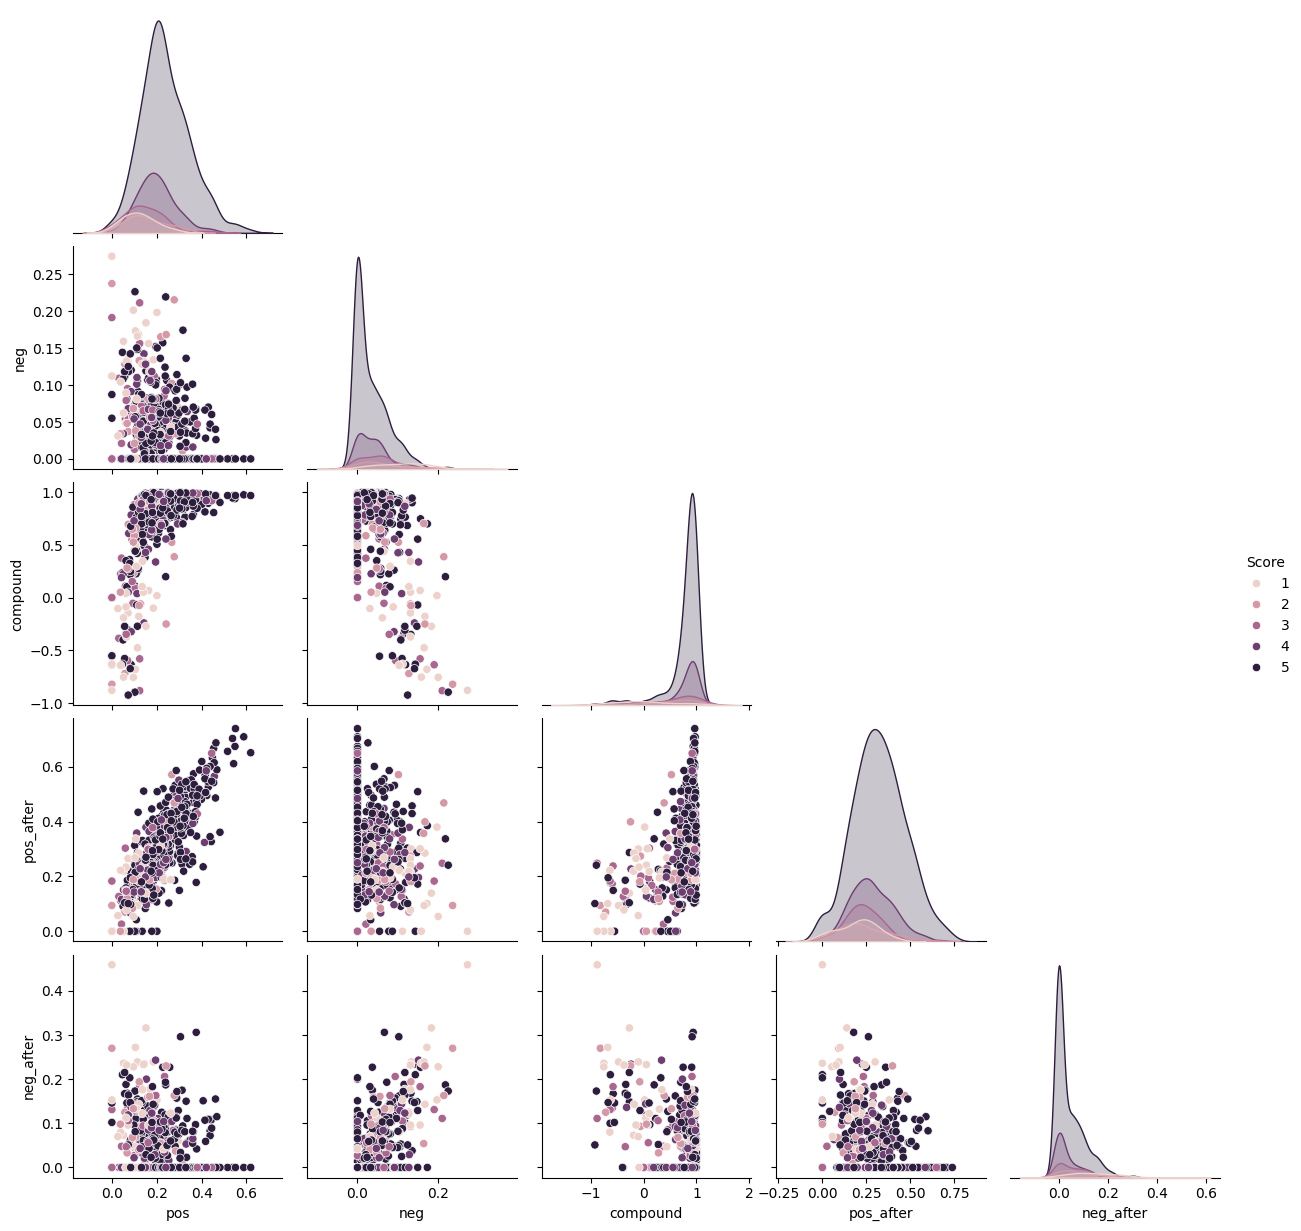

In [198]:
sns.pairplot(product_df[['Score','pos','neg','compound','pos_after','neg_after']],hue = 'Score',corner=True)

In [199]:
nltk.word_tokenize(example_text)

['I',
 'first',
 'sampled',
 'these',
 'chips',
 'at',
 'a',
 'volleyball',
 'tournament',
 'in',
 'California',
 '.',
 'I',
 "'m",
 'a',
 'big',
 'chip',
 'lover',
 ',',
 'and',
 'these',
 'are',
 'by',
 'far',
 'the',
 'best',
 'chips',
 'I',
 "'ve",
 'ever',
 'had',
 '.',
 'Better',
 'than',
 'the',
 'baked',
 ';',
 'not',
 'greasy',
 'at',
 'all',
 ',',
 'sturdy',
 'for',
 'dips',
 '.',
 'I',
 'highly',
 'recommend',
 'these',
 'chips',
 'to',
 'any',
 'chip',
 'lover',
 '!',
 '(',
 'I',
 "'ve",
 'not',
 'purchased',
 'them',
 'from',
 'Amazon',
 ',',
 'so',
 'I',
 'do',
 "n't",
 'know',
 'how',
 'they',
 'will',
 'fare',
 'during',
 'shipping',
 '.',
 ')']

## Negative > 0

In [200]:
negative_reviews =  ' '.join(text for text in product_df.loc[product_df['neg']>0,'Text'])
negative_reviews



'like puf natur chip make uniqu chip market. order salt vinegar absolut love flavor, hand favorit chip ever. tri cheddar regular flavor well. cheddar 4/5 regular 3/5 prefer strong flavor obvious would case regular. salt vinegar kind weak compar regular s&v chips, quit flavor make want come back more. love chips! alway big fan potato chips, one sinc discov popchips. great dip alone. constantli re-ord them. one note however-if low salt diet chip probabl you. high sodium. go case everi two months. love pay join subscrib save program amazon. save money stay supplied! chip great! look almost like flatten rice cake, tast much better, like potato chip. bbq flavor delicious. low fat full flavor. easi eat entir bag these! first popchip last week local deli miami. impress came onlin find (not even rememb brand name) i\'m happi favorit onlin retail amazon offer them. necessarili want $20 worth chip (lol) hand, love much need mani half home, half work (in differ flavors). i\'m sure price much chea

## Negative > 0 and Score  == 1

In [201]:
product_df.loc[(product_df['Score']==1) & (product_df['neg']>0)]

,Score,Summary,Text,pos,neg,neu,compound,pos_after,neg_after,neu_after,compound_after
65,1,Never tasted cheddar cheese like this!,realli want like read good reviews. chees snob...,0.185,0.134,0.682,-0.0999,0.300,0.239,0.462,0.1007
75,1,Not a fan of the Sweet Potato Pop Chips,famili like everi flavor tri (bbq best). like ...,0.296,0.070,0.634,0.9441,0.417,0.060,0.523,0.9468
110,1,Naturally nasty,care they'r natur fried. tast odd textur like ...,0.201,0.198,0.602,0.0186,0.380,0.153,0.467,0.5267
434,1,THESE HAVE CHANGED....AND NOT FOR THE BETTER!,let start say purchas popchip sever years. eve...,0.168,0.118,0.714,0.8960,0.212,0.177,0.612,0.1531
443,1,just awful,love flavors...thi one horrible. cannot return...,0.120,0.168,0.712,-0.1783,0.285,0.143,0.572,0.5411
452,1,My Pop Chips were rancid,order pop chip amazon months. last box nasty. ...,0.105,0.173,0.722,-0.6808,0.101,0.272,0.627,-0.7717
453,1,"Other Flavors are Great, these Not So Much","name flavor sound fantastic, wonder includ mul...",0.137,0.132,0.731,0.3453,0.216,0.176,0.608,0.4199
455,1,not tasty,"low calorie, true. tri flavor salt & vinegar. ...",0.072,0.132,0.796,-0.1459,0.265,0.096,0.640,0.5707
476,1,tasted funny,"purchas past, order tast littl stale. purchas ...",0.000,0.112,0.888,-0.6310,0.000,0.153,0.847,-0.4019
477,1,Jalapeno? More like gym socks and garbage.,"holi barf bag, jalapeno popchip foul. love ori...",0.176,0.035,0.789,0.8943,0.292,0.061,0.647,0.9422


In [202]:
negative_tokens =  nltk.word_tokenize(negative_reviews)
negative_tokens

['like',
 'puf',
 'natur',
 'chip',
 'make',
 'uniqu',
 'chip',
 'market',
 '.',
 'order',
 'salt',
 'vinegar',
 'absolut',
 'love',
 'flavor',
 ',',
 'hand',
 'favorit',
 'chip',
 'ever',
 '.',
 'tri',
 'cheddar',
 'regular',
 'flavor',
 'well',
 '.',
 'cheddar',
 '4/5',
 'regular',
 '3/5',
 'prefer',
 'strong',
 'flavor',
 'obvious',
 'would',
 'case',
 'regular',
 '.',
 'salt',
 'vinegar',
 'kind',
 'weak',
 'compar',
 'regular',
 's',
 '&',
 'v',
 'chips',
 ',',
 'quit',
 'flavor',
 'make',
 'want',
 'come',
 'back',
 'more',
 '.',
 'love',
 'chips',
 '!',
 'alway',
 'big',
 'fan',
 'potato',
 'chips',
 ',',
 'one',
 'sinc',
 'discov',
 'popchips',
 '.',
 'great',
 'dip',
 'alone',
 '.',
 'constantli',
 're-ord',
 'them',
 '.',
 'one',
 'note',
 'however-if',
 'low',
 'salt',
 'diet',
 'chip',
 'probabl',
 'you',
 '.',
 'high',
 'sodium',
 '.',
 'go',
 'case',
 'everi',
 'two',
 'months',
 '.',
 'love',
 'pay',
 'join',
 'subscrib',
 'save',
 'program',
 'amazon',
 '.',
 'save',
 '

In [203]:
negative_tags =  nltk.pos_tag(negative_tokens)

In [204]:
negative_tags

[('like', 'IN'),
 ('puf', 'NN'),
 ('natur', 'VBP'),
 ('chip', 'NN'),
 ('make', 'VBP'),
 ('uniqu', 'JJ'),
 ('chip', 'NN'),
 ('market', 'NN'),
 ('.', '.'),
 ('order', 'NN'),
 ('salt', 'NN'),
 ('vinegar', 'NN'),
 ('absolut', 'NN'),
 ('love', 'NN'),
 ('flavor', 'NN'),
 (',', ','),
 ('hand', 'NN'),
 ('favorit', 'NN'),
 ('chip', 'NN'),
 ('ever', 'RB'),
 ('.', '.'),
 ('tri', 'VB'),
 ('cheddar', 'NN'),
 ('regular', 'JJ'),
 ('flavor', 'NN'),
 ('well', 'RB'),
 ('.', '.'),
 ('cheddar', 'NN'),
 ('4/5', 'CD'),
 ('regular', 'JJ'),
 ('3/5', 'CD'),
 ('prefer', 'NN'),
 ('strong', 'JJ'),
 ('flavor', 'NN'),
 ('obvious', 'JJ'),
 ('would', 'MD'),
 ('case', 'NN'),
 ('regular', 'VB'),
 ('.', '.'),
 ('salt', 'NN'),
 ('vinegar', 'NN'),
 ('kind', 'NN'),
 ('weak', 'JJ'),
 ('compar', 'NN'),
 ('regular', 'JJ'),
 ('s', 'NN'),
 ('&', 'CC'),
 ('v', 'NN'),
 ('chips', 'NNS'),
 (',', ','),
 ('quit', 'NN'),
 ('flavor', 'NN'),
 ('make', 'VBP'),
 ('want', 'VBP'),
 ('come', 'VB'),
 ('back', 'RB'),
 ('more', 'RBR'),
 ('.', '

In [205]:
nouns_df =  pd.DataFrame(columns=['names'])

In [206]:
for item in negative_tags:
    if item[1] == 'NN':
        nouns_df.loc[len(nouns_df.index)]={'names' : item[0]}
nouns_df.head()

,names
0,puf
1,chip
2,chip
3,market
4,order


In [207]:
nouns_df.value_counts()

names      
br             546
chip           485
flavor         346
potato         235
bag            215
              ... 
devast           1
detrimental      1
desper           1
desir            1
zowie            1
Name: count, Length: 1489, dtype: int64

In [208]:
pareto_df =  nouns_df.value_counts().nlargest(20).rename_axis('characteristic').reset_index(name = 'count')
pareto_df

,characteristic,count
0,br,546
1,chip,485
2,flavor,346
3,potato,235
4,bag,215
5,i,136
6,salt,131
7,tast,127
8,popchip,106
9,snack,94


In [209]:
pareto_df['cumpec']=pareto_df['count'].cumsum()/pareto_df['count'].sum()*100

pareto_df

,characteristic,count,cumpec
0,br,546,17.825661
1,chip,485,33.659811
2,flavor,346,44.955926
3,potato,235,52.628142
4,bag,215,59.647405
5,i,136,64.087496
6,salt,131,68.364349
7,tast,127,72.510611
8,popchip,106,75.971270
9,snack,94,79.040157


In [210]:
from matplotlib.ticker import PercentFormatter

In [211]:
def pareto(pareto_df):
    fig,ax = plt.subplots()
    ax.bar(pareto_df['characteristic'],pareto_df['count'])
    plt.xticks(rotation=90)
    ax2 = ax.twinx()

    ax2.plot(pareto_df['characteristic'],pareto_df['cumpec'],color='red',marker = 'o')
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.axhline(80,color ='green')


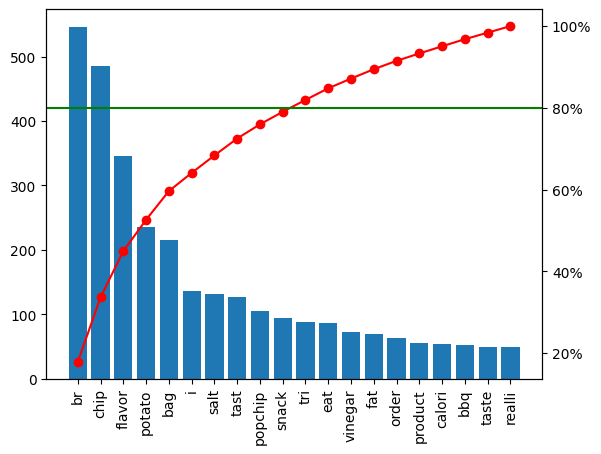

In [212]:
pareto(pareto_df)

In [214]:
product_df [product_df['Text'].str.contains('bag') & product_df['neg'] > 0 ]

,Score,Summary,Text,pos,neg,neu,compound,pos_after,neg_after,neu_after,compound_after
4,5,healthy and delicious,chip great! look almost like flatten rice cake...,0.335,0.050,0.615,0.9560,0.415,0.056,0.529,0.9273
9,5,Great Chip,"local tj' use carri these, more. there' costco...",0.208,0.032,0.760,0.9455,0.270,0.000,0.730,0.9136
11,4,A lower calorie alternative to standard chips:...,"etern dieter' quest: replac oily, fatty, oh-so...",0.177,0.060,0.763,0.9958,0.187,0.063,0.750,0.9860
13,5,These are great!,never seen chip order cheddar sour cream onion...,0.233,0.022,0.745,0.8990,0.436,0.046,0.519,0.9571
15,5,PopChips are the best!,"weight watcher, popchip realli satisfi need ch...",0.293,0.059,0.648,0.8516,0.282,0.083,0.635,0.7184
...,...,...,...,...,...,...,...,...,...,...,...
545,5,"Once again, America's food scientists bring us...","popchip chili lime potato crunchi potato chip,...",0.073,0.125,0.802,-0.9254,0.101,0.051,0.848,0.7845
550,3,"Taste more like ""Tomato and Basil"" than ""Chili...",note: review chili lime flavor popchip. amazon...,0.064,0.079,0.858,-0.3488,0.146,0.047,0.807,0.9349
552,5,Terrific chip!,"warned, bbq flavor terribl addicting. fact, i'...",0.179,0.081,0.740,0.7096,0.213,0.102,0.685,0.6562
559,5,Life-saver for chip lovers trying to eat healt...,love potato chips. could eat bag thank power b...,0.304,0.017,0.679,0.9951,0.383,0.021,0.595,0.9898


<Axes: xlabel='Score'>

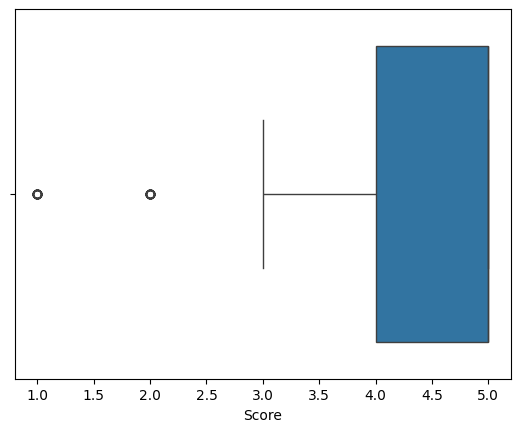

In [215]:
sns.boxplot(product_df,x='Score')

Write here your insights. 